# Real or Not? NLP with Disaster Tweets (Kaggle)

  **Task**: Predict which Tweets are about real disasters and which ones are not
  
## What am I predicting?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

## Columns
**id** - a unique identifier for each tweet <br/>
**text** - the text of the tweet <br/>
**location** - the location the tweet was sent from (may be blank) <br/>
**keyword** - a particular keyword from the tweet (may be blank) <br/>
**target** - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


**Link to the dataset:** https://www.kaggle.com/c/nlp-getting-started/data

# Exploratory Data Analysis


In [571]:
# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import plotly.tools as tls
import cufflinks as cf
from wordcloud import WordCloud, STOPWORDS 


import re
import os
from tqdm.notebook import tqdm
from collections import Counter



import warnings
warnings.filterwarnings('ignore')

In [572]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [573]:
# Loading the data
tweet = pd.read_csv("train.csv")

In [574]:
tweet.head(5)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

The id column is an unique identifier for each tweet, we are going to drop it.

In [575]:
# dropping the id column
tweet.drop(["id"], axis = 1, inplace = True)

In [576]:
# shape of the data
tweet.shape

(7613, 4)

In [577]:
tweet.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [578]:
# our data is slightly imbalanced
# 1 represents the tweet is about real disaster
# 0 means normal tweet
cf.set_config_file(theme="ggplot") # Set themes
tweet.target.value_counts().iplot(kind = "bar")

## Analysis of the "text" column

In [141]:
# this function will print random texts from the data
def print_random(data=None, count=5):
    done = []
    index = np.random.randint(low=0, high=tweet.shape[0])
    for i in range(0, count+1):
        index = np.random.randint(low=0, high=tweet.shape[0])
        if index not in done:
            print(data["text"].iloc[index])
            print("class: {}".format(data["target"].iloc[index]))
            print(70*"=")
            print("\n")
        else:
            data.append(index)

In [142]:
# printing 10 tweets
print_random(data=tweet, count=15)

Some great footage of STRONG work from San Bernardino County Fire who is also working the wild fires right now.... http://t.co/QCYQHvn2Ha
class: 1


APD investigating fatal shooting of 3 year old child in southeast Anchorage http://t.co/qYccvUubkr
class: 1


@TheNissonian @RejectdCartoons nissan are you ok do you need medical assistance i can call an ambulance if you need me to
class: 0


America like South Africa is a traumatised sick country - in different ways of course - but still messed up.
class: 0


@DavidCovucci We can't because a sinkhole swallowed every taco place in the neighborhood
class: 0


China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks
class: 1


that exploded &amp; brought about the
beginning of universe matches what's
mentioned in the versethe heaven and Earth
(thus the universe)
class: 0


@5hvzlaRadio Love what you picked! We're playing WORTH IT by FIFTH HARM/KID INK because of you! Listen &amp; Vote: http://t.co

In [143]:
print_random(data=tweet, count=5)

320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29
class: 0


I entered to #win the ENTIRE set of butterLONDON Lip Crayons via @be_ram0s. - Go enter! #bbloggers http://t.co/DsB3lDfuxU
class: 0


The sunset looked like an erupting volcano .... My initial thought was the Pixar short Lava http://t.co/g4sChqFEsT
class: 1


suddenly it's off &amp; on gloomy &amp; thunder so loud it shakes the windows? Not ever on the Bay Area. Miss me w/that lol http://t.co/x4eCGGvnSN
class: 1


#news Britons rescued amid Himalaya floods http://t.co/kEPznhXHXd
class: 1


Would have just flattened the little midget ?? https://t.co/BhufevaGPu
class: 0




**Some of the tweets contains usernames of other twitter accounts user names, links, integers, hashtags etc. It is important to note that the hashtag can give us lot of information regarding the tweet**

In [144]:
dis_words = " ".join(tweet[tweet["target"] == 1]["text"])
dis_count = Counter(dis_words.split())

norm_words = " ".join(tweet[tweet["target"] == 0]["text"])
norm_count = Counter(norm_words.split())

In [145]:
# most occured words in normal tweets
norm_count.most_common(40)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442),
 ('on', 387),
 ('-', 374),
 ('with', 349),
 ('that', 326),
 ('The', 295),
 ('it', 290),
 ('be', 268),
 ('like', 233),
 ('this', 225),
 ('by', 225),
 ('have', 219),
 ('at', 212),
 ('was', 205),
 ('your', 201),
 ('me', 195),
 ('are', 195),
 ('just', 193),
 ('so', 190),
 ('&amp;', 190),
 ("I'm", 185),
 ('??', 183),
 ('but', 177),
 ('out', 172),
 ('up', 167),
 ('from', 166),
 ('not', 162),
 ('will', 146),
 ('as', 143),
 ('get', 142)]

In [146]:
# most occured words in dis tweets
dis_count.most_common(40)

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273),
 ('I', 259),
 ('The', 257),
 ('by', 244),
 ('from', 206),
 ('A', 167),
 ('that', 166),
 ('with', 159),
 ('was', 158),
 ('are', 150),
 ('it', 143),
 ('after', 140),
 ('as', 139),
 ('have', 134),
 ('via', 115),
 ('this', 110),
 ('fire', 108),
 ('my', 107),
 ('over', 107),
 ('...', 106),
 ('&amp;', 105),
 ('you', 103),
 ('be', 103),
 ('has', 98),
 ('been', 93),
 ('In', 90),
 ('who', 89),
 ('California', 86),
 ('killed', 86),
 ('like', 85)]

In [147]:
# this function will help us to plot visualizations

cf.set_config_file(theme="solar") # Set themes

def show_viz(count=50, target=None):
    lst = []
    if target == "normal":
        for w, n in norm_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
        df.columns = ["word", "count"]
        df.iplot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
                xTitle= "Words",
                yTitle = "count",
                color= "green")
    elif target == "disaster":
        for w, n in dis_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
        df.columns = ["word", "count"]
        df.iplot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
                xTitle= "Words",
                yTitle = "count",
                color= "red")
        

In [148]:
# 50 most appeared words in normal tweets
show_viz(target="normal", count=50)

In [149]:
# 100 most appeared tweets in normal tweets
show_viz(target="normal", count=100)

In [150]:
# 1000 most appeared tweets in normal tweets
show_viz(target="normal", count=1000)

In [151]:
# 50 most appeared words in disaster tweets
show_viz(target="disaster", count=50)

In [152]:
# 100 most appeared tweets in disaster tweets
show_viz(target="disaster", count=100)

In [153]:
# 1000 most appeared tweets in disaster tweets
show_viz(target="disaster", count=1000)

The above visualizations can give us a lot of insight regarding our data but it can be misleading as well as we have not preprocessed our data. We have a bunch of stopwords in our data. So, now
lets make a wordcloud where we will ignore the stop words and visualize the "text" column.

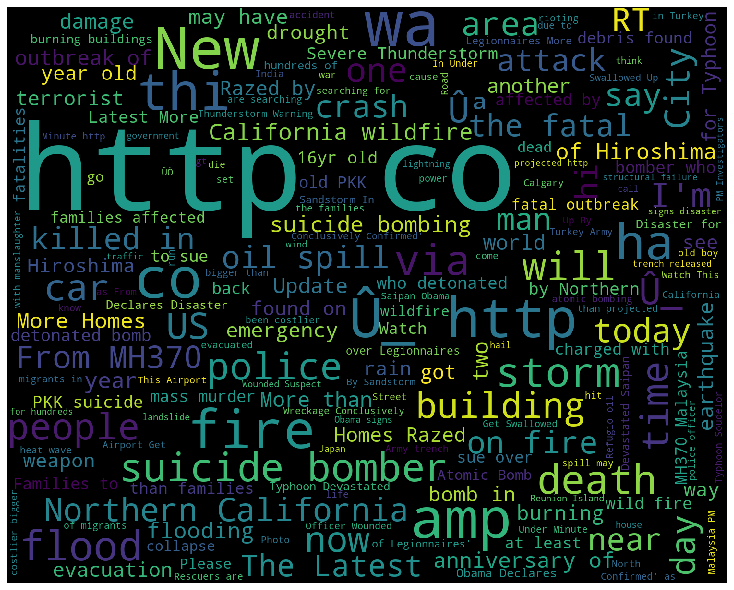

In [154]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(dis_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

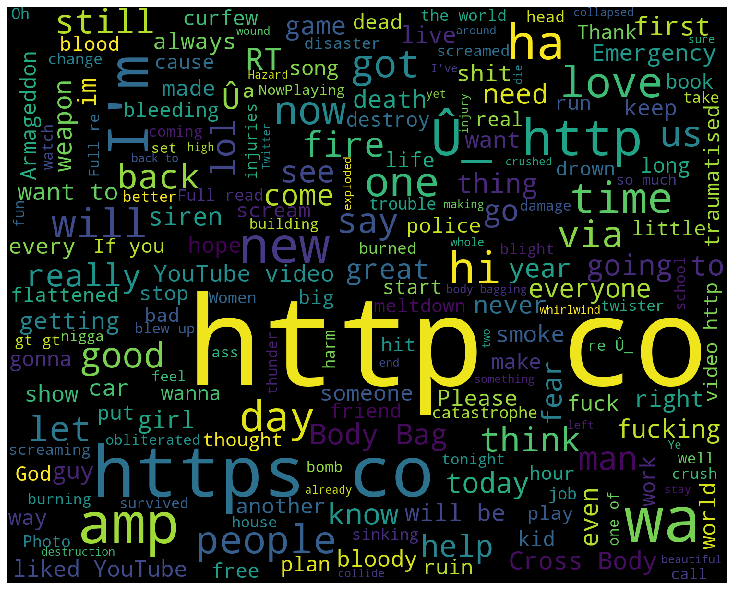

In [155]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(norm_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

 We can conclude that the tweets contains a lot of links of other websites and that can be useful for our model.

## Analysis of the "location" column

In [156]:
tweet.head(5)

keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

In [157]:
# Total NAN values
tweet["location"].isna().sum()

2533

In [158]:
total_con = len(tweet.location.value_counts())
print(f"There is all total {total_con} number of unique countries available.")

There is all total 3341 number of unique countries available.


In [159]:
# This function will help us to visualize the hotspots
normal_tweet_location = tweet[tweet["target"] == 0][["location", "target"]]["location"].value_counts(dropna = False)
disaster_tweet_location = tweet[tweet["target"] == 1][["location", "target"]]["location"].value_counts(dropna = False)


In [160]:
# From series to dataframe
normal_tweet_location_df = normal_tweet_location.to_frame().reset_index()
normal_tweet_location_df.columns = ["country", "count"]
disaster_tweet_location_df = disaster_tweet_location.to_frame().reset_index()
disaster_tweet_location_df.columns = ["country", "count"]


In [161]:
normal_tweet_location_df = normal_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

disaster_tweet_location_df = disaster_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

In [162]:
normal_tweet_location_df.head(5)

country  count
0            NaN   1458
1       New York     55
2            USA     37
3         London     29
4  United States     23

In [163]:
disaster_tweet_location_df.head(5)

country  count
0            NaN   1075
1            USA     67
2  United States     27
3        Nigeria     22
4          India     20

In [164]:
# The below function helps us to visualize the country column in threshold of occurence

def location_viz(low = 0, high = 50, target = None):
    cf.set_config_file(theme="solar") # Set themes
    if target == "normal":
        count_dataframe = normal_tweet_location_df[normal_tweet_location_df["count"].apply(lambda x: high >= x >=low)]
        
        
        count_dataframe.iplot(kind = "bar",
        x = "country",
        y = "count",
        color="blue",
        title=f"Range: {high}-{low}, {target} Tweets",
        xTitle= "Country",
        yTitle = "Country count")
                                                                            
    elif target == "disaster":
        count_dataframe = disaster_tweet_location_df[disaster_tweet_location_df["count"].apply(lambda x: high >=x >=low)]
        
        
        count_dataframe.iplot(kind = "bar",
        x = "country",
        y = "count",
        color="red",
        title=f"Range: {high}-{low}, {target} Tweets",
        xTitle= "Country",
        yTitle = "Country count")


In [165]:
location_viz(low = 10, high = 55, target="normal");

As we can see above, in normal tweets the most common countries are the above. Also, it is very important to note that we have all total 1458 NAN values in normal tweets.

In [166]:
location_viz(low = 5, high = 10, target="normal");

The above are the countries that occures 10 to 5 times in normal tweets. We can simply see the count by just hovering over the plot.

In [167]:
location_viz(low = 0, high = 5, target="normal");

The above plot tells us that there are many countries that occures 1 to 5 times in normal tweets. That tells us that
if we perform one hot encoding over the country column, we can easily run into **curse of dimensionality** problem. We need to clean the location column as well. 

In [168]:
location_viz(low = 10, high = 55, target="disaster");

The above plot shows the most frequent countries that occures in disaster tweets. Here we can see **United States** occures 27 times.

In [169]:
location_viz(low = 5, high = 10, target="disaster");

The above plot shows the most frequent countries in Dis tweets, they occure 10 to 5 times.

In [170]:
location_viz(low = 0, high = 5, target="disaster");

There are too many countries that has count in between 5 to 1. **Memphis, TN** occures 5 times.

## Analysis of the "Keyword" column

In [171]:
tweet.head(5)

keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

In [172]:
total = tweet["keyword"].isnull().sum()
print(f"There are all total {total} NAN values available in keyword column")

There are all total 61 NAN values available in keyword column


In [173]:
normal_tweet_kw = tweet[tweet.target == 0][["keyword"]]
normal_tweet_kw = normal_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
normal_tweet_kw.columns = ["keyword", "count"]


disaster_tweet_kw = tweet[tweet.target == 1][["keyword"]]
disaster_tweet_kw = disaster_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
disaster_tweet_kw.columns = ["keyword", "count"]

In [174]:
normal_tweet_kw.head(5)

keyword  count
0  body%20bags     40
1   armageddon     37
2         harm     37
3      wrecked     36
4       deluge     36

In [175]:
disaster_tweet_kw.head(5)

keyword  count
0         NaN     42
1    wreckage     39
2    outbreak     39
3  derailment     39
4      debris     37

In [176]:
normal_tweet_lkw = normal_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')


disaster_tweet_lkw = disaster_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')

In [177]:
normal_tweet_lkw.iplot(kind = "bar",
                       x = "keyword", 
                       y = "count",  
                       color = "green", 
                       orientation='h')

In [178]:
disaster_tweet_lkw.iplot(kind = "bar",
                         x = "keyword",
                         y = "count",
                         color = "red",
                         orientation='h')

# Data Cleaning and Preprocessing

First and foremost we have to clean the text column of the dataframe. We must remove noise from our text data.

In [579]:
tweet.head(5)

keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

In [580]:
print_random(data=tweet, count=5)

@yahoocare perhaps you should change you name to yahoo doesn't care.  Are you so inundated with complaints that you cannot respond to me??
class: 0


wreck? wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck?
class: 0


Aquarium Ornament Wreck Sailing Boat Sunk Ship Destroyer Fish Tank Cave Decor - Full read Û_ http://t.co/nosA8JJjiN http://t.co/WUKvdavUJu
class: 1


Can't believe more people in their mid 20's don't have high blood pressure. Life is stressful. #DecisionsOnDecisions
class: 1


The meaning I picked the one that changed my life: overcome fear behold wonder.

TCC catch the light... endless... http://t.co/eeRkH8ljws
class: 0


@DevinJoslyn thunder and lighting ????
class: 0




In [581]:
# Tqdm just gives us the status bar
from tqdm.notebook import tqdm
# Imporing Porter Stemmer
from nltk.stem import PorterStemmer 
count = 0
# Initializing the stemmer
ps = PorterStemmer()

# Stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"prolly", "probably", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", " ", phrase) # removes usernames
    phrase = re.sub(r"^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$", " ", phrase)  # removes phone numbers
    return phrase

for sentance in tqdm(tweet['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    tweet["text"][count] = sentance.strip()
    count += 1

In [582]:
# printing some tweets after cleaning and stemming
print_random(data = tweet, count = 15)

loan settlement day emerg money advanc treasur hous self outbre take home akx
class: 0


watch go flame
class: 1


watch airport get swallow sandstorm minut
class: 1


day tryout went good minu fact stop quickli get short ball annihil toenail injuri even
class: 0


littl piec wrote avalanch design blog would appreci greatli check
class: 0


hurt eat caus burn toung pepperoni yesterday
class: 0


oh okay got messag twice got suspici sorri check
class: 1


set thing fire alway option
class: 1


wow wow club blown money fuck player like would pillori
class: 0


beforeitsnew hundr fear dead libyan migrant boat capsiz rescu
class: 1


chemic spill cleanup video prepar emerg situat lab
class: 1


editor chief releas issu ramag fashion model mayhem
class: 0


scream top lung said guy would come back keep promis
class: 0


babi girl rescu coastguard float half mile sea socialnew
class: 1


went pick lunch today bartend hold chang hostag want number
class: 1


lol cousin cours caus di maria lol

In [583]:
print_random(data = tweet, count = 20)

mt treatment tiger china appal electrocut front businessmen amp eaten saveti
class: 1


dorman ignit knock deton sensor connector
class: 1


zayn blew twitter
class: 0


gm pray attack enemi derail ur destini block lord amp flood ur life w heavenli bless
class: 0


famili sue legionnair famili affect fatal outbreak legionnair disea
class: 1


tube strike live latest travel updat london engulf chao
class: 1


fx forex trade cramer iger word wreck disney stock
class: 0


preciou oliv tree lost battl anoth crazi windstorm yyc
class: 1


thank senat leadership irand militari deserv noth less thank
class: 0


derail train smithsonian
class: 1


got electrocut morn day go
class: 0


dolphin worship group base superstit take look tweet
class: 1


drop nigga damag
class: 0


parent experi may help coral offspr surviv climat chang precondit adult coral increas
class: 0


back ireland v sad traumatis freez not beauti parisian summer becom accustom
class: 0


tri electrocut ya ass lol hell no ai 

In [584]:
tweet.tail(5)

keyword location                                               text  \
7608     NaN      NaN     two giant crane hold bridg collaps nearbi home   
7609     NaN      NaN  control wild fire california even northern par...   
7610     NaN      NaN                                     volcano hawaii   
7611     NaN      NaN  polic investig e bike collid car littl portug ...   
7612     NaN      NaN  latest home raze northern california wildfir a...   

      target  
7608       1  
7609       1  
7610       1  
7611       1  
7612       1

# Feature Engineering and Dimensionality Reduction

Now, we will perform feature engineering then we will apply some dimensionality reduction techniques.

In [585]:
tweet.head(5)

keyword location                                               text  target
0     NaN      NaN          deed reason earthquak may allah forgiv us       1
1     NaN      NaN               forest fire near la rong sask canada       1
2     NaN      NaN  resid ask ishelt place notifi offic no evacu s...       1
3     NaN      NaN        peopl receiv wildfir evacu order california       1
4     NaN      NaN  got sent photo rubi alaska smoke wildfir pour ...       1

In [586]:
location_count = tweet["location"].value_counts().to_dict()

keyword_count = tweet["keyword"].value_counts().to_dict()

In [587]:
# Here we are counting nan values as 0 and we are replacing by count or frequency
count = 0
for k in tweet["keyword"]:
    if k is str:
        tweet["keyword"][count] = keyword_count[k]
    else:
        tweet["keyword"][count] = 0
    count += 1

In [588]:
count = 0
for k in tweet["location"]:
    if k is str:
        tweet["location"][count] = location_count[k]
    else:
        tweet["location"][count] = 0
    count += 1

In [589]:
tweet.head(5)

keyword location                                               text  target
0       0        0          deed reason earthquak may allah forgiv us       1
1       0        0               forest fire near la rong sask canada       1
2       0        0  resid ask ishelt place notifi offic no evacu s...       1
3       0        0        peopl receiv wildfir evacu order california       1
4       0        0  got sent photo rubi alaska smoke wildfir pour ...       1

In [590]:
# saving the preprocessed dataframe
tweet.to_csv('cleaned_tweets.csv') 

In [600]:
X_df = tweet.drop(["target"],axis = 1)
y_df = tweet["target"]

In [601]:
X_df.head(5)

keyword location                                               text
0       0        0          deed reason earthquak may allah forgiv us
1       0        0               forest fire near la rong sask canada
2       0        0  resid ask ishelt place notifi offic no evacu s...
3       0        0        peopl receiv wildfir evacu order california
4       0        0  got sent photo rubi alaska smoke wildfir pour ...

In [607]:
# performing oversampling using imblearn module
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_df, y_df)

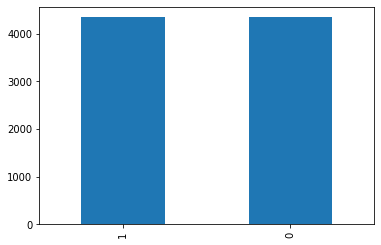

In [608]:
y_oversampled.value_counts().plot(kind = "bar")
# Hence balanced

In [609]:
# taking a glimpse
X_oversampled.head(5)

keyword location                                               text
0       0        0          deed reason earthquak may allah forgiv us
1       0        0               forest fire near la rong sask canada
2       0        0  resid ask ishelt place notifi offic no evacu s...
3       0        0        peopl receiv wildfir evacu order california
4       0        0  got sent photo rubi alaska smoke wildfir pour ...

In [610]:
# taking another glimpse
y_oversampled.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [611]:
# we are using tf-idf vectorizer
# here we are using one-gram and tri-gram as our features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X= vectorizer.fit_transform(X_oversampled["text"].values.ravel())

In [612]:
# feature engineered train data
X.shape

(8684, 95079)

In [613]:
# target column
y.shape

(8684,)

In [614]:
# checking if the training data is a sparse matrix
type(X)

scipy.sparse.csr.csr_matrix

Now let's apply T-sne to get an intuition of how the data is scattered in 8684 dimensions. We will make the 8684 dimension data to 2 dimension data to get an intuition of how they are scattered in the high dimension space. T-sne takes the points which are in the same neighborhood and embed them to the low dimensional space.

In [661]:
# Dimensionality reduction
from sklearn.manifold import TSNE
def show_Tsne(perplexity = None, x = None, y = None):    
    X_embedded = TSNE(n_components=2, perplexity=perplexity,n_iter=1500,n_jobs=-1).fit_transform(X)
    embedded = pd.DataFrame(X_embedded)
    embedded.columns = ["f1", "f2"]
    embedded["class"] = y
    def change(x):
        if x == 1:
            return "Disaster"
        else:
            return "Normal"

    embedded["class"] = embedded["class"].apply(change)
    fig = px.scatter(embedded, x="f1", y="f2", color="class")
    fig.show()

In [662]:
show_Tsne(perplexity= 30, x = X, y = y)

In [663]:
show_Tsne(perplexity= 25, x = X, y = y)

Here we can see the vectors regarding **normal tweets** are forming a cluster in 2 dim and the other class is a bit more scattered but some small clusters are being formed.

In [664]:
show_Tsne(perplexity= 20, x = X, y = y)

The dataset might be almost separable in the high dimensional space so we will apply **logistic regression** as it works pretty good with high dimensional datasets.

In [641]:
# Splitting the dataset into train and test, we are using 20% data for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [642]:
# the sparse matrix which represents the text data
type(X_train)

scipy.sparse.csr.csr_matrix

# Modelling

In [644]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


C_vals = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]

for num in C_vals:
    clf = LogisticRegression(C=num, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    f1 = f1_score(y_test, predicted)
    print(f"F1 score = {f1}")
    print("C value = {}".format(num))
    print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
    print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))
    print(70*"=")

F1 score = 0.0
C value = 0.0001
Train Accuracy = 50.15114437886857%
Test Accuracy = 49.395509499136445%
F1 score = 0.16684045881126172
C value = 0.001
Train Accuracy = 55.57794731538793%
Test Accuracy = 54.00115141047783%
F1 score = 0.6521739130434783
C value = 0.01
Train Accuracy = 80.62473009932344%
Test Accuracy = 73.28727691421992%
F1 score = 0.7716535433070866
C value = 0.1
Train Accuracy = 88.15315963725348%
Test Accuracy = 79.96545768566494%
F1 score = 0.813953488372093
C value = 1
Train Accuracy = 95.00503814596229%
Test Accuracy = 82.4985607369027%
F1 score = 0.8365155131264917
C value = 10
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%
F1 score = 0.8339307048984469
C value = 100
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.99539435808866%
F1 score = 0.8320382546323969
C value = 1000
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.82268278641337%
F1 score = 0.8293269230769231
C value = 10000
Train Accuracy = 98.56052972506117%
Test Accu

In [665]:
# 10 is the best hyperparameter
clf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
print(f"F1 score = {f1}")
print("C value = {}".format(num))
print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))

F1 score = 0.8293269230769231
C value = 10000
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%


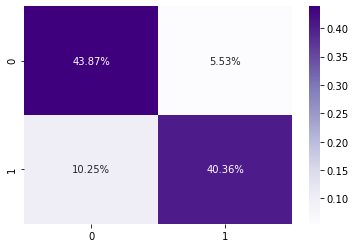

In [666]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples');

In [651]:
# saving the model
from joblib import dump

# saving the model
dump(clf, "Log-Reg-10.pkl") 

['Log-Reg-10.pkl']

In [680]:
# tesing 
text = ["""

Is it good?

"""]
feature_representation = vectorizer.transform(text).toarray()
if clf.predict(feature_representation) == 1:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][1]*100)
    print("Disaster tweet! {}%".format(prob))
else:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][0]*100)
    print("Normal tweet! {}%".format(prob))

Normal tweet! 91.38%


# Testing our model on text data

In [694]:
# loading the test data
test = pd.read_csv("test.csv")
test.drop(["keyword", "location", "id"], axis = 1, inplace = True)

In [695]:
# peaking into the data
test.head(5)

text
0                 Just happened a terrible car crash
1  Heard about #earthquake is different cities, s...
2  there is a forest fire at spot pond, geese are...
3           Apocalypse lighting. #Spokane #wildfires
4      Typhoon Soudelor kills 28 in China and Taiwan

In [696]:
# we need to preprocess the test data as well

count = 0
for sentance in tqdm(test['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    test["text"][count] = sentance.strip()
    count += 1
    

In [698]:
test.tail(10)

text
3253             malaysian pm confirm debri miss flight
3254  offici alabama home quarantin possibl ebola ca...
3255  see old pkk suicid bomber deton bomb turkey ar...
3256  confer attende blue line airport derail pleas ...
3257  death toll suicid car bomb ypg posit villag ra...
3258       earthquak safeti lo angel safeti fasten xrwn
3259  storm ri wors last hurrican hardest hit yard l...
3260                          green line derail chicago
3261                meg issu hazard weather outlook hwo
3262    cityofcalgari activ municip emerg plan yycstorm

In [711]:
test_input = test["text"].values
print(X_test)

['happen terribl car crash'
 'heard earthquak differ citi stay safe everyon'
 'forest fire spot pond gees flee across street cannot save' ...
 'green line derail chicago' 'meg issu hazard weather outlook hwo'
 'cityofcalgari activ municip emerg plan yycstorm']


In [712]:
# applying the same TF-IDF
X_test = vectorizer.transform(test_input).toarray()

In [713]:

X_test.shape

(3263, 95079)

In [720]:
predicted = []
for i in clf.predict(X_test):
    predicted.append(i)

In [729]:
new = pd.read_csv("test.csv")
new.drop(["keyword", "location", "id"], axis = 1, inplace = True)
new["preprocessed_test"] = test.text
new["predicted"] = predicted


In [736]:
new.head(70)

text  \
0                  Just happened a terrible car crash   
1   Heard about #earthquake is different cities, s...   
2   there is a forest fire at spot pond, geese are...   
3            Apocalypse lighting. #Spokane #wildfires   
4       Typhoon Soudelor kills 28 in China and Taiwan   
..                                                ...   
65  Horrible Accident  Man Died In Wings of Airpla...   
66  @god if an accident were to happen on this air...   
67  Horrible Accident Man Died In Wings of Airplan...   
68  #UPDATE: Picture from the Penn Twp. airplane a...   
69  See how a judge ruled in this 2009 accident at...   

                                    preprocessed_test  predicted  
0                            happen terribl car crash          1  
1       heard earthquak differ citi stay safe everyon          1  
2   forest fire spot pond gees flee across street ...          1  
3                      apocalyps light spokan wildfir          1  
4                  typhoon soudelor kill china taiwan          1  
..                                                ...        ...  
65                         horribl accid man die wing          1  
66  accid happen airplan idc rest luggag complet d...          0  
67                 horribl accid man die wing airplan          1  
68                updat pictur penn twp airplan accid          1  
69  see judg rule accid jfk airport involv korean air          1  

[70 rows x 3 columns]

In [731]:
# saving the dataframe as an excel file
new.to_excel("predicted_test.xlsx") 